In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Self imports
from eclipses import *
from src import *
from plotting import *
from cpop import *
import nfft

In [ ]:
from utils.set_dir_to_root import set_dir_to_root

# Getting the Curve
set_dir_to_root()
with open("data/all_systems.txt") as f:
    all_systems = f.read().split(",")
eclipses = get_eclipses(all_systems[70], "data/combined") #kplr006545018.fits
eclipses.head()

In [ ]:
from src.handle_double_eclipses import remove_doubles
from src.noise_filtering import complete_filter

filtered = complete_filter(eclipses, "delta", return_diagnositics=False)
filtered['delta'].plot.hist()

In [ ]:
filtered.plot.scatter(y='delta', x='time')

In [19]:
period = getOC(filtered)
period

KeyError: 0

In [6]:
period = period * round(filtered["delta"].median() / period, 0)
period # this might break it, I hope not

1.9957283510768098

In [7]:
max(align_data(filtered["time"], period / 2) % period)

1.6044814148093376

In [20]:
eclipses["residuals"] = align_data(eclipses["time"], period / 2) % period - period / 2
eclipses["residuals"]

0       0.997864
2       1.004721
4       0.991143
6       0.997999
8       1.004854
          ...   
1346    0.988940
1348    0.995779
1350    1.002619
1352    0.989027
1356    1.002820
Name: residuals, Length: 639, dtype: float64

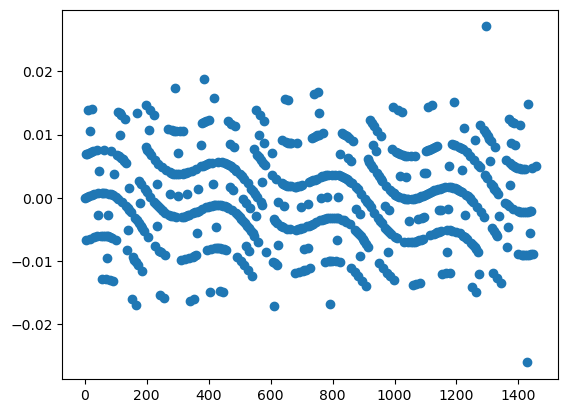

In [21]:
plt.scatter(x=eclipses["time"], y=align_data(eclipses["time"], period / 2) % period - period / 2)
plt.show()

In [11]:
N = 10000
k = - N // 2 + np.arange(N)
f_k = np.random.randn(N)

# non-equispaced fast Fourier transform
f = nfft.nfft(eclipses["residuals"], f_k)